In [28]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.datasets import fashion_mnist
from keras.applications.vgg16 import VGG16
from keras.utils import to_categorical
from keras.optimizers import Adam

In [29]:
classes = ['футболка', 'штани', 'светр', 'сукня', 'пальто',
           'туфлі', 'сорочка', 'кросівки', 'сумка', 'черевики']

## Частина 1

In [30]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [31]:
X_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]

In [32]:
model = Sequential()
model.add(Conv2D(64, (5, 5),
                    padding="same",
                    activation="relu",
                    input_shape=(28, 28, 1)))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), padding="same",
                    activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), padding="same",
                    activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [33]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 128)         409728    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 3, 3, 128)        

In [35]:
history = model.fit(
    X_train,
    y_train,
    epochs=8,
    batch_size=128,
    validation_data=(X_valid, y_valid)
)

Epoch 1/8
430/430 [==============================] - 304s 701ms/step - loss: 0.5265 - accuracy: 0.8089 - val_loss: 0.3242 - val_accuracy: 0.8846
Epoch 2/8
430/430 [==============================] - 281s 653ms/step - loss: 0.3148 - accuracy: 0.8864 - val_loss: 0.2750 - val_accuracy: 0.9000
Epoch 3/8
430/430 [==============================] - 189s 440ms/step - loss: 0.2670 - accuracy: 0.9017 - val_loss: 0.2381 - val_accuracy: 0.9114
Epoch 4/8
430/430 [==============================] - 198s 460ms/step - loss: 0.2330 - accuracy: 0.9136 - val_loss: 0.2410 - val_accuracy: 0.9124
Epoch 5/8
430/430 [==============================] - 197s 458ms/step - loss: 0.2122 - accuracy: 0.9229 - val_loss: 0.2098 - val_accuracy: 0.9194
Epoch 6/8
430/430 [==============================] - 199s 463ms/step - loss: 0.1920 - accuracy: 0.9275 - val_loss: 0.2254 - val_accuracy: 0.9144
Epoch 7/8
430/430 [==============================] - 199s 462ms/step - loss: 0.1733 - accuracy: 0.9353 - val_loss: 0.2071 - val_ac

In [36]:
results = model.evaluate(X_test, y_test)
print("Відсоток правильних відповідей на тесті: ", round(results[1] * 100, 4))

313/313 [==============================] - 9s 29ms/step - loss: 32.3790 - accuracy: 0.8831
Відсоток правильних відповідей на тесті:  88.31


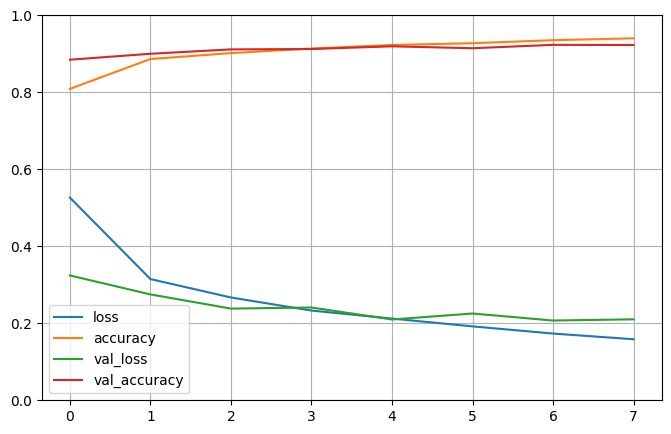

In [37]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

313/313 [==============================] - 9s 29ms/step


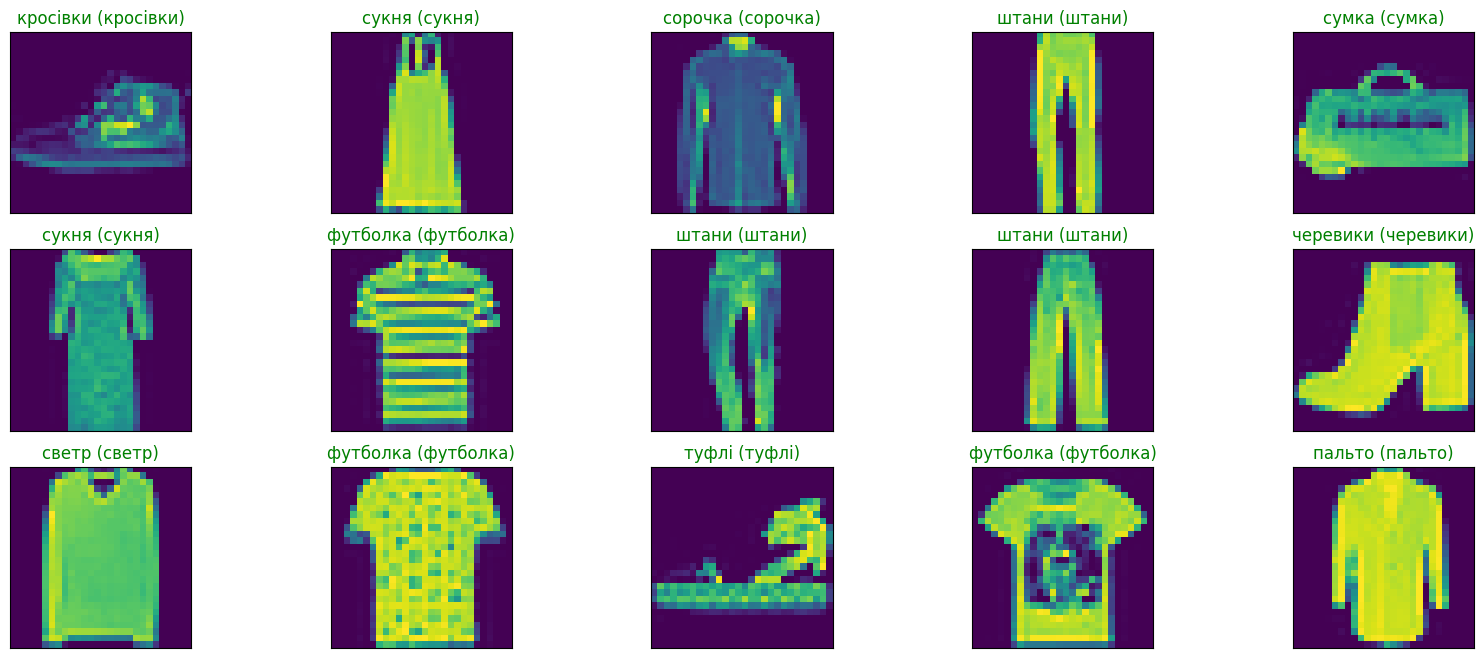

In [38]:
y_hat = model.predict(X_test)

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]
    ax.set_title("{} ({})".format(classes[predict_index],
                                  classes[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

## Частина 2

In [39]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [40]:
X_train = tf.image.resize(np.array(X_train)[..., tf.newaxis], (32, 32))
X_train = np.repeat(X_train, 3, axis=-1)
X_test = tf.image.resize(np.array(X_test)[..., tf.newaxis], (32, 32))
X_test = np.repeat(X_test, 3, axis=-1)
X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0

In [41]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [42]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = False

In [43]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [44]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
history = model.fit(
    X_train, y_train, epochs=8, verbose=1, batch_size=128, validation_split=0.2
)

Epoch 1/8
375/375 [==============================] - 245s 654ms/step - loss: 0.6145 - accuracy: 0.7895 - val_loss: 0.4734 - val_accuracy: 0.8286
Epoch 2/8
375/375 [==============================] - 249s 663ms/step - loss: 0.4334 - accuracy: 0.8421 - val_loss: 0.4428 - val_accuracy: 0.8374
Epoch 3/8
375/375 [==============================] - 248s 661ms/step - loss: 0.3948 - accuracy: 0.8556 - val_loss: 0.4057 - val_accuracy: 0.8527
Epoch 4/8
375/375 [==============================] - 245s 654ms/step - loss: 0.3718 - accuracy: 0.8640 - val_loss: 0.4111 - val_accuracy: 0.8491
Epoch 5/8
375/375 [==============================] - 245s 655ms/step - loss: 0.3534 - accuracy: 0.8704 - val_loss: 0.4003 - val_accuracy: 0.8553
Epoch 6/8
375/375 [==============================] - 246s 656ms/step - loss: 0.3398 - accuracy: 0.8751 - val_loss: 0.3927 - val_accuracy: 0.8561
Epoch 7/8
375/375 [==============================] - 246s 657ms/step - loss: 0.3304 - accuracy: 0.8778 - val_loss: 0.3759 - val_ac

In [46]:
results = model.evaluate(X_test, y_test)
print("Відсоток правильних відповідей на тесті: ", round(results[1] * 100, 4))

313/313 [==============================] - 48s 152ms/step - loss: 0.3744 - accuracy: 0.8660
Відсоток правильних відповідей на тесті:  86.6


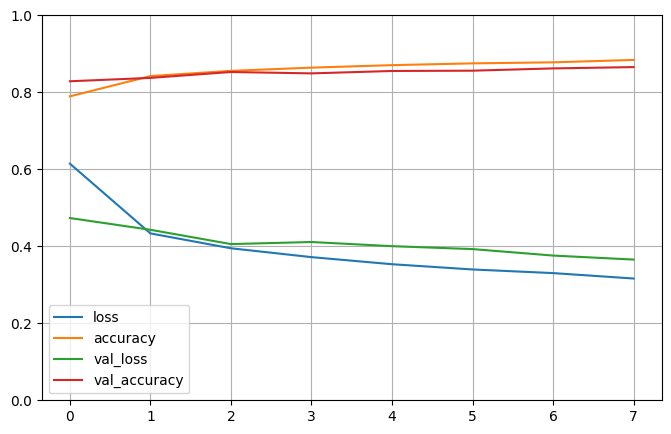

In [47]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [48]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [49]:
for i, layer in enumerate(model.layers):
    layer._name = 'layer_' + str(i)


conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


modified_model = Sequential([
   conv_base,
   Flatten(),
   Dense(256, activation="relu"),
   Dense(10, activation="softmax"),
])

In [50]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])


history = model.fit(
    X_train, y_train, epochs=2, verbose=1, batch_size=128, validation_split=0.2
)

Epoch 1/2
375/375 [==============================] - 247s 657ms/step - loss: 0.2873 - accuracy: 0.8952 - val_loss: 0.3515 - val_accuracy: 0.8716
Epoch 2/2
375/375 [==============================] - 249s 665ms/step - loss: 0.2832 - accuracy: 0.8966 - val_loss: 0.3537 - val_accuracy: 0.8702


In [51]:
results = model.evaluate(X_test, y_test)
print("Відсоток правильних відповідей на тесті: ", round(results[1] * 100, 4))

313/313 [==============================] - 50s 160ms/step - loss: 0.3654 - accuracy: 0.8695
Відсоток правильних відповідей на тесті:  86.95
